In [2]:
import torch
import torch.nn as nn


import matplotlib.pyplot as plt

from torch.utils.data import TensorDataset, DataLoader

from common import *

In [3]:
import logging, sys
logging.basicConfig(stream=sys.stderr, level=logging.INFO)
logging.debug('A debug message!')


In [4]:
torch.autograd.set_detect_anomaly(True)
device = "cpu"

In [5]:
# read the data from the "GeneratorInput.txt" file
def read_data(file_name):
    with open(file_name, 'r') as file:
        data = file.readlines()
    return data

raw_data = read_data("GeneratorInput.txt")

datasets = []
y_idx = 0
dataset = None
for line in raw_data:
    if len(line) <= 1:
        datasets.append(dataset.copy())
        y_idx = 0
        dataset = []
        continue
    y_idx += 1
    if dataset is None:
        dataset = []
    for x_idx,char in enumerate(line):
        if char == '0' or char == '1':
            dataset.append((y_idx,x_idx+1, int(char)))
    

In [6]:
data = datasets[1]
X = torch.tensor([list(sublist[:2]) for sublist in data], dtype=torch.float32)
y = torch.tensor([item for sublist in data for item in sublist[2:]], dtype=torch.float32).unsqueeze(1)


#scale the data to be between 0 and 1
X = X / X.max()
X

tensor([[0.1000, 0.3000],
        [0.1000, 0.8000],
        [0.1000, 0.9000],
        [0.2000, 0.1000],
        [0.2000, 0.5000],
        [0.2000, 0.6000],
        [0.2000, 0.7000],
        [0.2000, 1.0000],
        [0.3000, 0.4000],
        [0.3000, 0.8000],
        [0.3000, 0.9000],
        [0.3000, 1.0000],
        [0.4000, 0.1000],
        [0.4000, 0.2000],
        [0.4000, 0.6000],
        [0.4000, 0.7000],
        [0.5000, 0.1000],
        [0.5000, 0.7000],
        [0.5000, 0.9000],
        [0.6000, 0.6000],
        [0.6000, 1.0000],
        [0.7000, 0.1000],
        [0.7000, 0.3000],
        [0.7000, 0.5000],
        [0.7000, 0.7000],
        [0.7000, 0.8000],
        [0.7000, 0.9000],
        [0.7000, 1.0000],
        [0.8000, 0.1000],
        [0.8000, 0.2000],
        [0.8000, 0.4000],
        [0.8000, 0.6000],
        [0.9000, 0.1000],
        [0.9000, 0.2000],
        [0.9000, 0.4000],
        [0.9000, 0.5000],
        [0.9000, 0.6000],
        [0.9000, 0.8000],
        [1.0

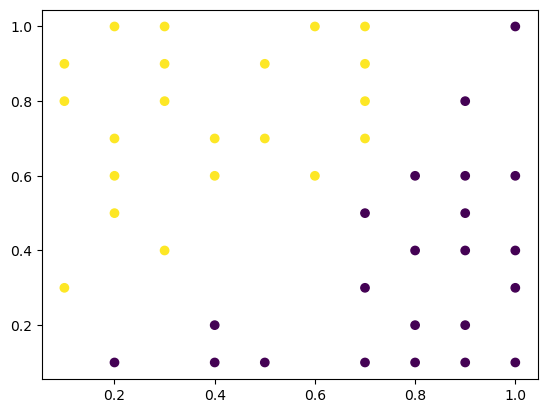

In [7]:
# plot X and y
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()


# Network1


Epoch [20/200], Loss: 0.2594, Accuracy: 72.09
Epoch [40/200], Loss: 0.8260, Accuracy: 83.72
Epoch [60/200], Loss: 0.5608, Accuracy: 90.70
Epoch [80/200], Loss: 0.5005, Accuracy: 95.35
Epoch [100/200], Loss: 0.2561, Accuracy: 95.35
Epoch [120/200], Loss: 0.2111, Accuracy: 95.35
Epoch [140/200], Loss: 0.5835, Accuracy: 97.67
Epoch [160/200], Loss: 0.4661, Accuracy: 97.67
Epoch [180/200], Loss: 0.4458, Accuracy: 97.67
Epoch [200/200], Loss: 0.6266, Accuracy: 97.67


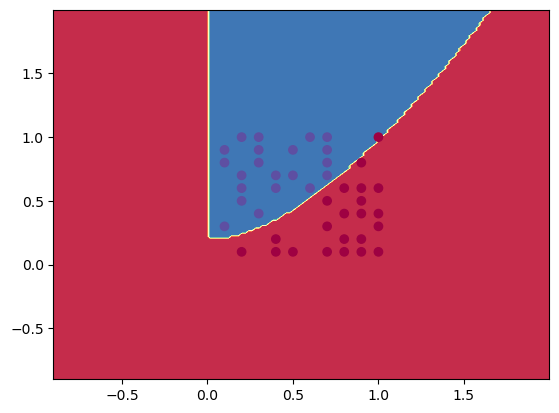

In [8]:
# Create a PyTorch dataset and data loader
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

model = Network1()
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# Train the model
num_epochs = 200
for epoch in range(num_epochs):
    for X_batch, y_batch in dataloader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

    # calculate accuracy for all training data
    y_pred = model(X)
    y_pred = torch.round(y_pred)
    correct = (y_pred == y).sum().item()
    accuracy = correct / len(y)
    

    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss:.4f}, Accuracy: {accuracy * 100:.2f}")
        
plot_decision_boundary(model, X, y) 

# Network 2

In [10]:
# Create a PyTorch dataset and data loader
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)


model = Network2()
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.005)
total_epochs = 0
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


Epoch [20/3000] total 20, Loss: 0.7578, Accuracy: 4.65
Epoch [40/3000] total 40, Loss: 0.7687, Accuracy: 4.65
Epoch [60/3000] total 60, Loss: 0.6724, Accuracy: 11.63
Epoch [80/3000] total 80, Loss: 0.6854, Accuracy: 32.56
Epoch [100/3000] total 100, Loss: 0.6733, Accuracy: 39.53
Epoch [120/3000] total 120, Loss: 0.6973, Accuracy: 46.51
Epoch [140/3000] total 140, Loss: 0.6719, Accuracy: 48.84
Epoch [160/3000] total 160, Loss: 0.6129, Accuracy: 58.14
Epoch [180/3000] total 180, Loss: 0.6639, Accuracy: 74.42
Epoch [200/3000] total 200, Loss: 0.6635, Accuracy: 79.07
Epoch [220/3000] total 220, Loss: 0.6356, Accuracy: 83.72
Epoch [240/3000] total 240, Loss: 0.6377, Accuracy: 86.05
Epoch [260/3000] total 260, Loss: 0.5934, Accuracy: 86.05
Epoch [280/3000] total 280, Loss: 0.6414, Accuracy: 86.05
Epoch [300/3000] total 300, Loss: 0.5607, Accuracy: 86.05
Epoch [320/3000] total 320, Loss: 0.6392, Accuracy: 86.05
Epoch [340/3000] total 340, Loss: 0.4622, Accuracy: 88.37
Epoch [360/3000] total 3

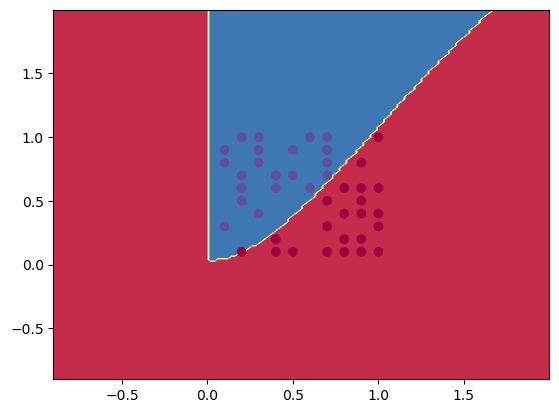

In [11]:
# Train the model
num_epochs = 3000
for epoch in range(num_epochs):
    for X_batch, y_batch in dataloader:
        y_pred = model(X_batch)
        
        
        loss = criterion(y_pred, y_batch)
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()


    # calculate accuracy for all training data
    y_pred = model(X)
    y_pred = torch.round(y_pred)
    correct = (y_pred == y).sum().item()
    accuracy = correct / len(y)
    total_epochs += 1
    

    if accuracy > 0.99:
        print("HOORAY")
        break
    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}] total {total_epochs}, Loss: {loss:.4f}, Accuracy: {accuracy * 100:.2f}")
    
print(f"total epochs: {total_epochs}")
plot_decision_boundary(model, X, y)

In [12]:
# print all parameters of the model
for name, param in model.named_parameters():
    print(f"{name} has shape {param.shape} and value {param}")

# print model gradients
for name, param in model.named_parameters(): 
    print(f"{name} has gradient {param.grad}")
    

polynomial.bias_before has shape torch.Size([2]) and value Parameter containing:
tensor([0.2522, 0.8287], requires_grad=True)
polynomial.bias has shape torch.Size([1]) and value Parameter containing:
tensor([0.9203], requires_grad=True)
polynomial.synapses.0.0.power has shape torch.Size([1]) and value Parameter containing:
tensor([2.2718], requires_grad=True)
polynomial.synapses.0.0.term_weights has shape torch.Size([3]) and value Parameter containing:
tensor([-4.4069, -0.0778,  1.9691], requires_grad=True)
polynomial.synapses.0.1.power has shape torch.Size([1]) and value Parameter containing:
tensor([1.3441], requires_grad=True)
polynomial.synapses.0.1.term_weights has shape torch.Size([3]) and value Parameter containing:
tensor([ 3.3065, -0.1573, -0.4657], requires_grad=True)
product.bias_before has shape torch.Size([2]) and value Parameter containing:
tensor([ 1.2298, -0.7751], requires_grad=True)
product.bias has shape torch.Size([1]) and value Parameter containing:
tensor([-0.9574